# Lösungen 7

In [1]:
from math import *
import numpy as np
from matplotlib import pyplot as plt

## Aufgabe 1
### d)
Aus notebook07.ipynb übernommen:

In [3]:
def horner(x, xs, c):
    """Berechnet den Wert des Interpolationspolynoms P_n an der Stelle x 
    für die Stützstellen xs und die Koeffizienten der Newton-Darstellung c."""
    n = len(c) - 1
    if len(xs) < n:
        raise Exception("Zu wenige Stützstellen!")
    p = c[n]
    for k in range(n-1, -1, -1):
        p = c[k] + (x - xs[k])*p
    return p 

In [4]:
def newton_coeffs(xs, ys):
    """Berechnet die Koeffizienten c des Interpolationspolynoms in 
    Newton-Darstellung für die Stützstellen xs und Werte ys."""
    n = len(xs) - 1
    if not len(ys) == n+1:
        raise Exception("""Brauche genauso viele Stützstellen wie Werte!""")
    c = 1.*ys
    for k in range(1, n+1):
        for i in range(n, k-1, -1):
            c[i] = (c[i] - c[i-1])/(xs[i] - xs[i-k])
    return c

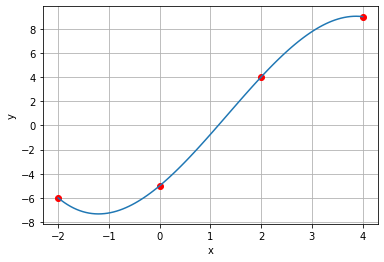

In [5]:
xs = np.array([2, -2, 4, 0])
ys = np.array([4, -6, 9, -5])
#Bestimme Koeffizienten des Interpolationspolynoms in Newton-Darstellung
c = newton_coeffs(xs, ys)
#Werte Interpolationspolynom auf x mithilfe von Horner-Schema aus
x = np.linspace(-2, 4, 100)
y = horner(x, xs, c)
#Plotte Daten und Interpolationspolynom
plt.plot(xs, ys, 'ro')
plt.plot(x, y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()